<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Retail Datasets</font></h1>

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import random
import warnings
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats.distributions as dist
%matplotlib inline

In [9]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [10]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [16]:
# CHECKING MISSING DATA
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [17]:
#CONVERT OBJECT-TYPED TO INTERGER
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors = 'coerce')

In [18]:
df = df[df['SALE PRICE'].notnull()]
len(df)

69987

Checking Minimun and Maximum point of data to avoid outliers

In [24]:
df['SALE PRICE'].max()

2210000000.0

In [25]:
df['SALE PRICE'].min()

0.0

In [26]:
#Setting range of data 
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

In [28]:
df['SALE PRICE'].max()

4996841.0

In [30]:
df['SALE PRICE'].min()

100335.0

##### Measure of Central Tendency
1. Mean

In [31]:
df['SALE PRICE'].mean()

867034.2480194669

2. Median

In [32]:
df['SALE PRICE'].median()

630000.0

3. Mode

In [33]:
df['SALE PRICE'].mode()

0    450000.0
dtype: float64

##### Measure of Spread
1. Range of data

In [34]:
np.ptp(df['SALE PRICE'])

4896506.0

In [36]:
# Manually
df['SALE PRICE'].max() - df['SALE PRICE'].min()

4896506.0

2. Variance

In [38]:
var_ = statistics.variance(df['SALE PRICE'])
var_

601408063100.8433

3. Stardard Deviation

In [42]:
std_ = statistics.stdev(df['SALE PRICE'])
std_

775505.0374438862

4. Skewness

In [40]:
df['SALE PRICE'].skew()

2.3446374221747437

5. 25%, 50%, AND 75% PERCENTILES

In [41]:
statistics.quantiles(df['SALE PRICE'], n = 4, method = 'inclusive')

[397117.0, 630000.0, 995000.0]

##### PROBABILITY DISTRIBUTION
Real Distribution of Data (Populate Distrubtion)

C:\Users\roytu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


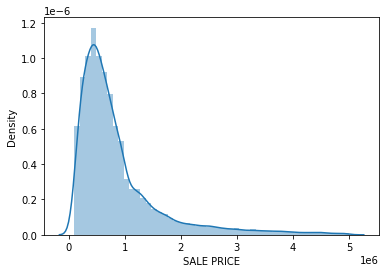

In [44]:
ax = sns.distplot(df['SALE PRICE'])

From curve which plotted above, we can conclude that the majority of data lies on between $ 0 - 1 million sale price

Sample Distribution

In [46]:
# Calculate Population Mean
pop_mean_mass = df['SALE PRICE'].mean()
pop_mean_mass

867034.2480194669

In [48]:
# Calculate Population Standard Deviation
pop_std_dev_mass = df['SALE PRICE'].std()
pop_std_dev_mass

775505.037443877

In [50]:
# Generate random sample
sample_means = []
n = 50
for sample in range(0, 500):
    sample_values = np.random.choice(a=df['SALE PRICE'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

In [67]:
sample_means

[881263.38,
 760800.24,
 821457.38,
 1107876.84,
 806363.44,
 960784.48,
 1076883.08,
 914776.9,
 838323.4,
 1069746.74,
 997803.38,
 977845.36,
 933322.8,
 926482.66,
 743054.24,
 909683.12,
 771557.28,
 844708.42,
 960519.76,
 842461.0,
 1083310.92,
 703533.56,
 1099717.88,
 1005173.0,
 852909.36,
 848641.64,
 831758.88,
 718023.36,
 677811.32,
 676732.68,
 1024714.8,
 867593.42,
 726298.8,
 848726.36,
 704587.28,
 773938.92,
 855196.84,
 1094414.06,
 736453.42,
 737487.04,
 997463.36,
 678024.94,
 654787.18,
 734370.44,
 899962.54,
 941029.18,
 1014223.5,
 864457.04,
 840193.02,
 728222.44,
 1052312.64,
 842247.5,
 855075.04,
 943346.96,
 1063430.0,
 640840.56,
 957600.9,
 971846.22,
 999828.44,
 997431.12,
 950409.26,
 1091802.08,
 809986.76,
 970269.16,
 932023.74,
 875669.22,
 857873.88,
 1092573.92,
 730073.64,
 889499.14,
 951160.28,
 822387.0,
 796387.78,
 1013736.68,
 895776.26,
 867327.98,
 1033666.96,
 1064931.38,
 959088.06,
 955766.22,
 711672.76,
 686915.58,
 739706.32,


In [84]:
# Calculate median of Sample Means

median_of_sample_means = np.median(sample_means)
median_of_sample_means

872184.34

In [82]:
# Calculate mean of Sample Means

mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

878327.5014000001

In [85]:
# Calculate Standard Deviation of Sample Means

std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

109433.82821485541

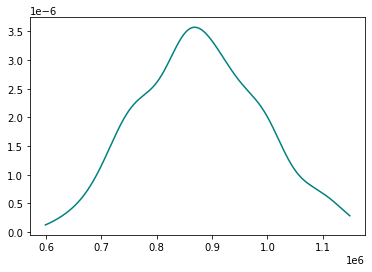

In [56]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')

Almost alike, both distribution of population and distribution of sample are telling us that the majority of distribution lies on between $ 0.8 and 1 million sale price.

##### CONFIDENCE INTERVALS

In [68]:
n = len(sample_means)
n

500

In [59]:
#z-score from the z table
z = 1.96         

In [69]:
# Calculate Standard Error
standard_err = pop_std_dev_mass / np.sqrt(n)
standard_err

34681.639612360574

In [70]:
lcb = mean_of_sample_means - z* standard_err  #lower limit of the CI
ucb = mean_of_sample_means + z* standard_err  #upper limit of the CI
lcb, ucb

(810351.4877597734, 946303.5150402267)

That means the true mean of Sale Price fall between 810351.487 and 946303.515

##### HYPOTHESIS TESTING

HYPOTHESIS : 

KATEGORI BANGUNAN ONE FAMILY DWELLINGS ADALAH TIPE BANGUNAN YANG MEMILIKI PROPORSI PENJUALAN LEBIH DARI 20% pada tahun 2010, APAKAH KATEGORI BANGUNAN ONE FAMILY DWELLINGS MENGALAMI KENAIKAN PENJUALAN YANG SIGNIFIKAN PADA TAHUN 2016 DAN 2017?



Ho: p0 = 0.20 -- > null hypothesis

Ha: p > 0.20   -- > alternative hypothesis



Find prove to reject the null hypothesis:

In [73]:
data = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].count()
data

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         12447
02 TWO FAMILY DWELLINGS                          9587
03 THREE FAMILY DWELLINGS                        2246
04 TAX CLASS 1 CONDOS                            1230
05 TAX CLASS 1 VACANT LAND                        384
06 TAX CLASS 1 - OTHER                             36
07 RENTALS - WALKUP APARTMENTS                   1359
08 RENTALS - ELEVATOR APARTMENTS                   21
09 COOPS - WALKUP APARTMENTS                     2393
10 COOPS - ELEVATOR APARTMENTS                  10986
11 SPECIAL CONDO BILLING LOTS                       1
11A CONDO-RENTALS                                  10
12 CONDOS - WALKUP APARTMENTS                     646
13 CONDOS - ELEVATOR APARTMENTS                  9357
14 RENTALS - 4-10 UNIT                            286
15 CONDOS - 2-10 UNIT RESIDENTIAL                 977
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         27
17 CONDO COOPS                                   1085
21 O

In [75]:
# Length of ONE FAMILY DWELLINGS IS 12609
n = len(df)
p_target = 12609/n
p_target

0.23069323233986497

ONE FAMILY DWELLINGS has more than 23% proportion of number of sales, which more than the null hypothesis (20%). 

But the question is how significant ONE FAMILY DWELLINGS category sales in 2016 and 2017 more than 2010?

In [77]:
# Calculate standard error
se = np.sqrt(0.20 * (1-0.20) / len(df))
se

0.00171094912516551

In [78]:
#Best estimate
be = p_target

#hypothesized estimate
he = 0.20
test_stat = (be - he)/se
test_stat

17.939301577360357

In [80]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
pvalue

5.818178917804616e-72

Dari significance level alpha 5% atau 0.05. Tingkat signifikansi lebih dari 5%.

Di sini p-value lebih tinggi dari significance level yang ditentukan yaitu 0.05. Jadi, kita fail to reject the null hypothesis. Artinya, tidak terdapat perbedaan yang signifikan dalam proporsi penjualan kategori bangunan ONE FAMILY DWELLINGS di 2016 dan 2017 daripada penjualan di 2010.